In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

In [2]:
# Load the DataFrame
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# data type of each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



we have 0 values in Glucose BloodPressure SkinThickness Insulin BMI which scientifically is not correct hence they are our missing values filled with 0

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
# Split the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
pd.DataFrame(X)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
pd.DataFrame(y)

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# randome_state = Reproducibility

In [10]:
# 80% of the X dataset
pd.DataFrame(X_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [11]:
# 20% of the y dataset
pd.DataFrame(X_test)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [12]:
# the output of the X_train 
pd.DataFrame(y_train)

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [13]:
# the output of the X_test
pd.DataFrame(y_test)

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


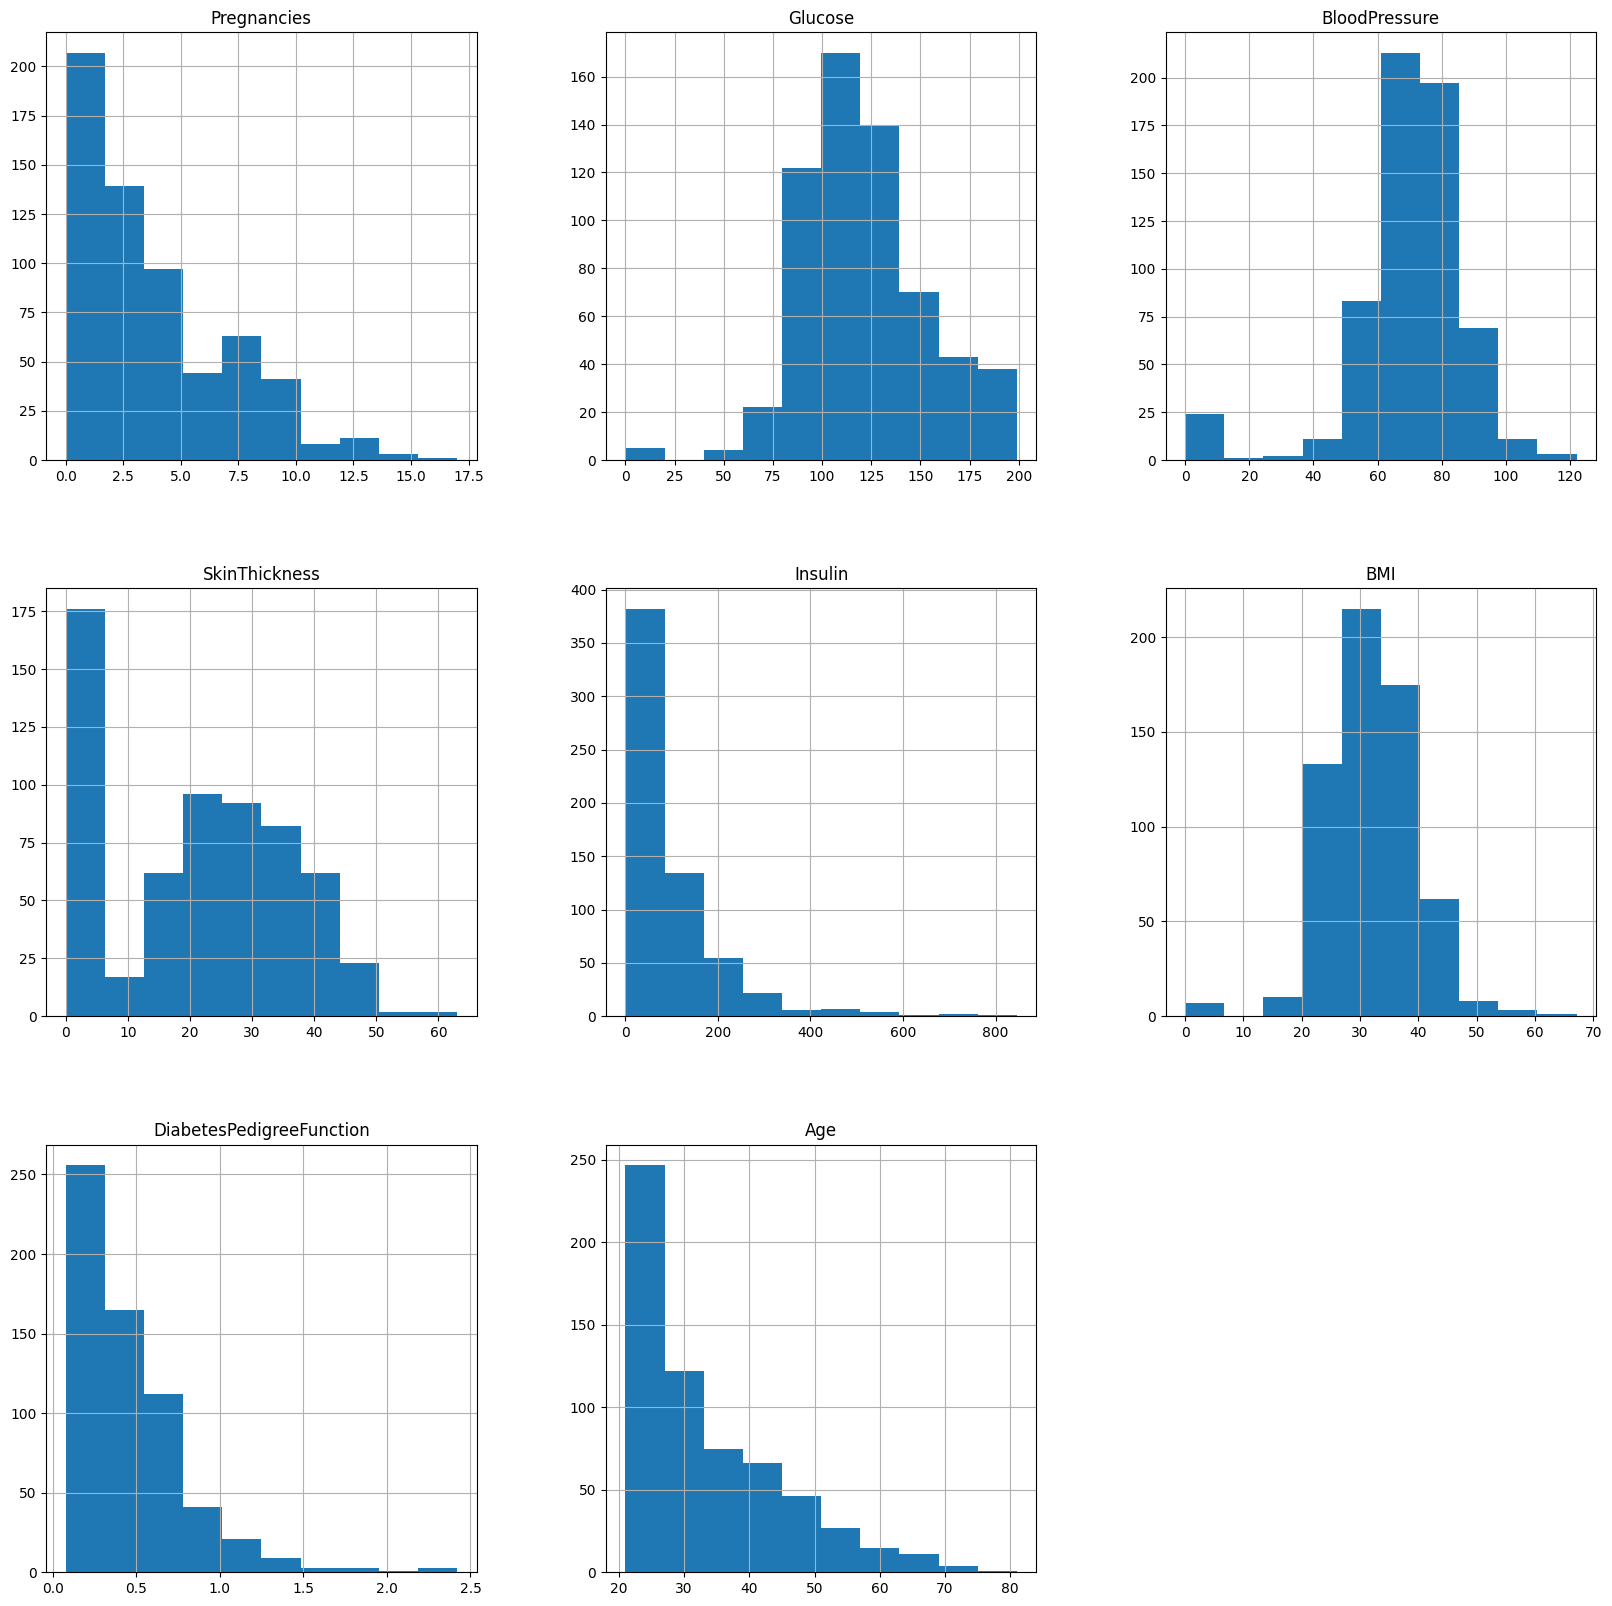

In [14]:
X_train.hist(figsize = (20,20))
plt.show()

BMI, glucose, bloodpressure, skinthickness seem to be normal distributions.
rest have heavy skew

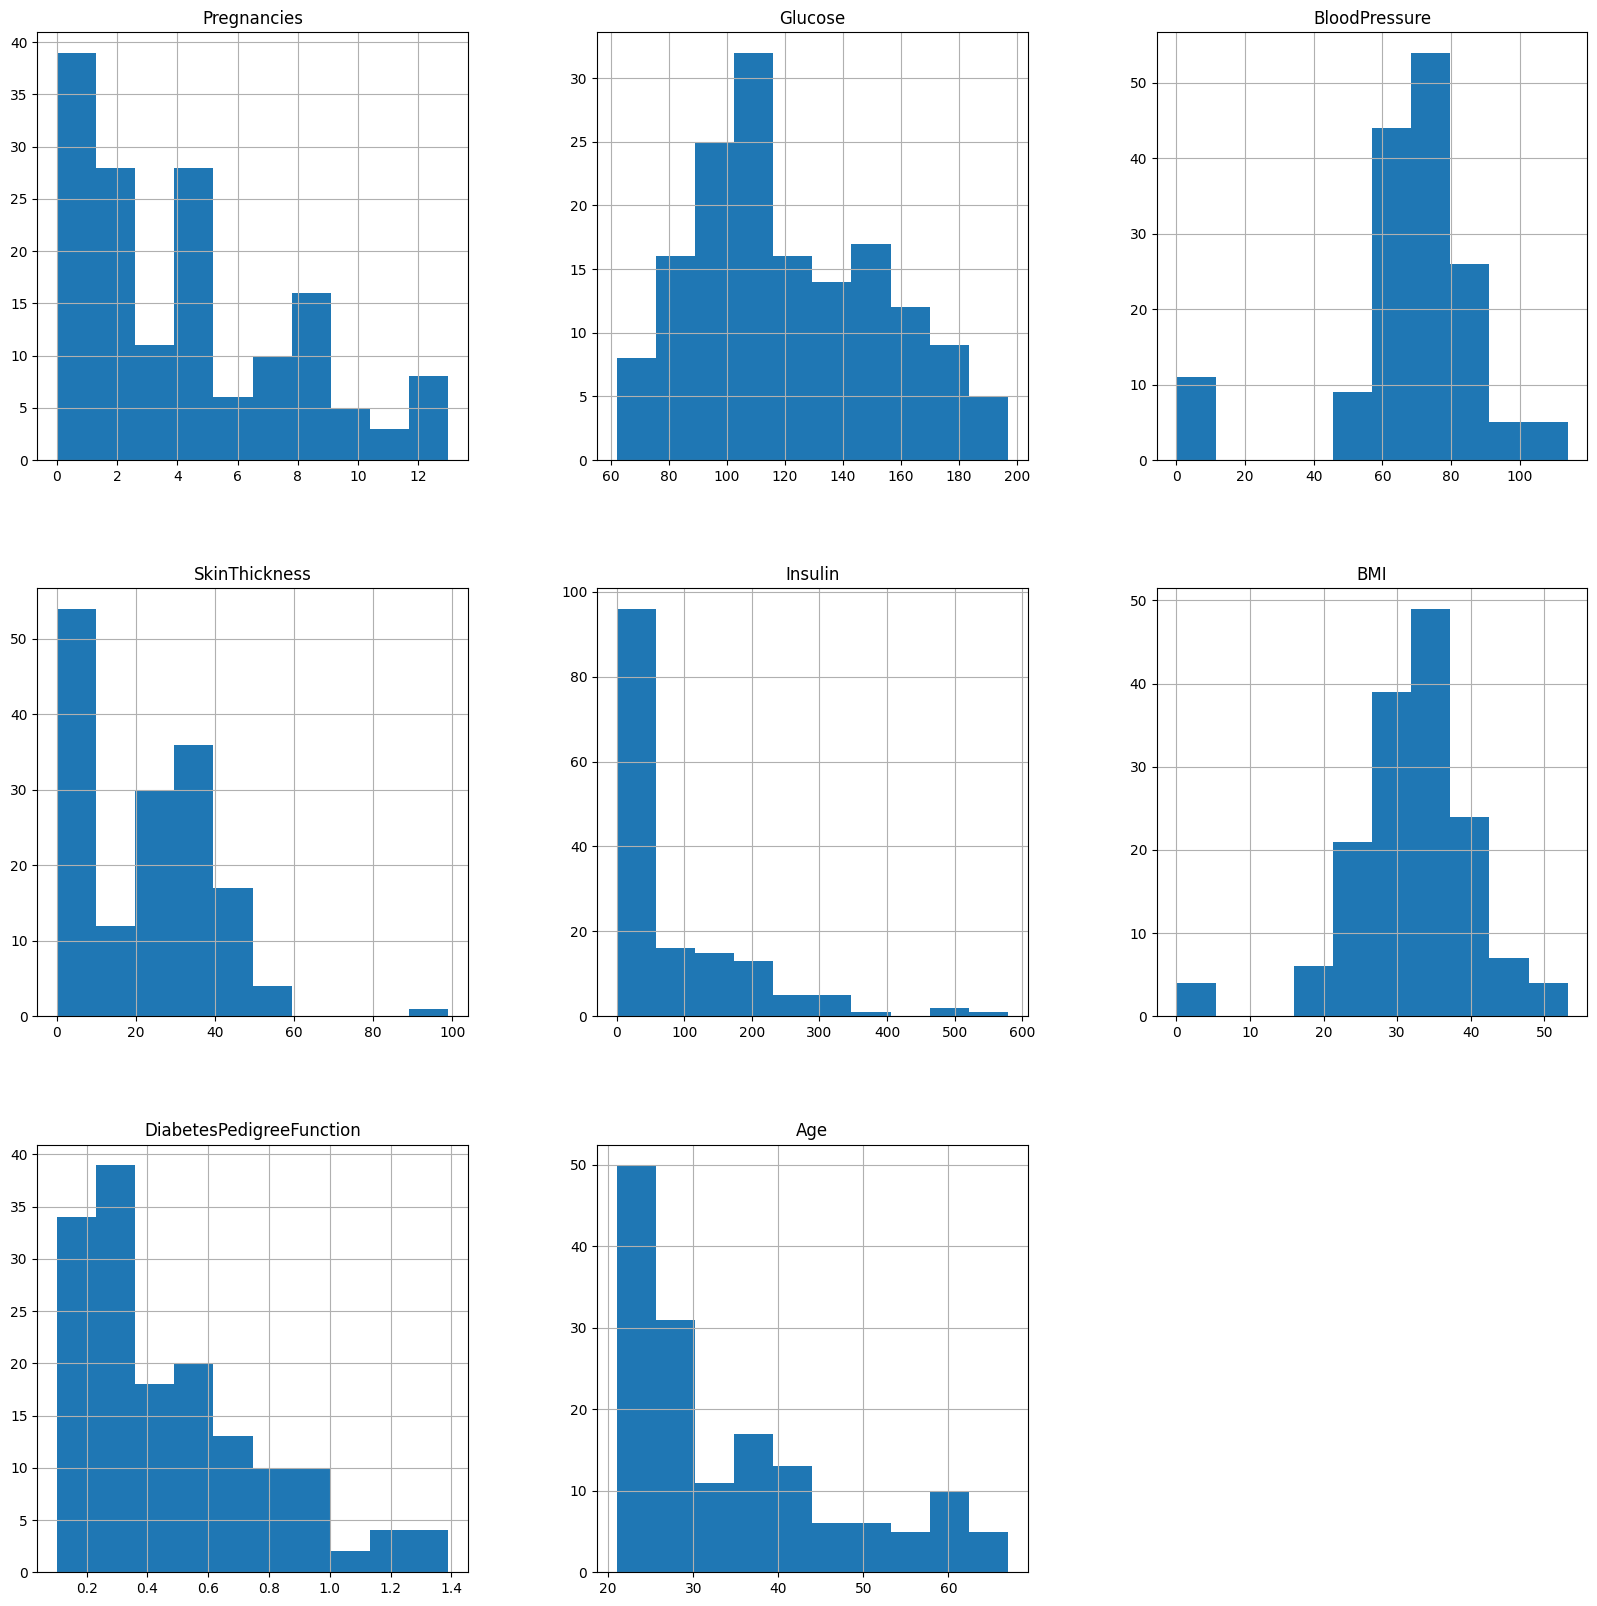

In [15]:
X_test.hist(figsize = (20,20))
plt.show()

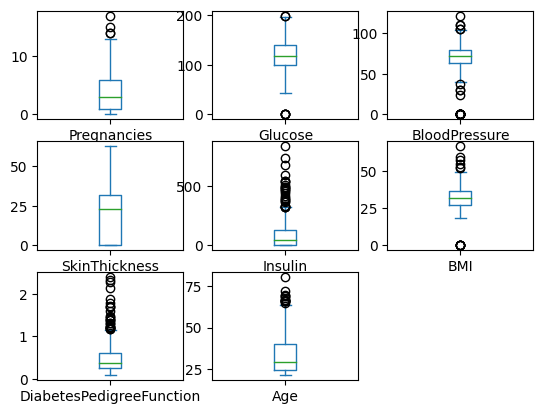

In [16]:
X_train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

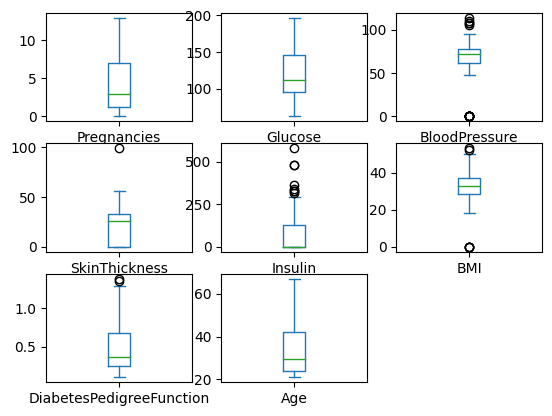

In [17]:
X_test.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# data preprocessing 
* outlier handling 
* missing value handling 
* feature selection 
* data normalization
* data balancing

In [18]:
columns_with_zeros = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(X_train[columns_with_zeros].isin([0]).sum())
print(X_test[columns_with_zeros].isin([0]).sum())

Glucose            5
BloodPressure     24
SkinThickness    176
Insulin          290
BMI                7
dtype: int64
Glucose           0
BloodPressure    11
SkinThickness    51
Insulin          84
BMI               4
dtype: int64


In [19]:
# Columns where 0 values should be replaced with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing 0 with NaN in X_train and X_test for the specified columns
for column in columns_to_replace:
    X_train[column] = X_train[column].replace(0, np.nan)
    X_test[column] = X_test[column].replace(0, np.nan)

In [20]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Counting NaN values in each specified column
print("X_train")
print(X_train[columns_to_check].isna().sum())
print("X_test")
print(X_test[columns_to_check].isna().sum())

X_train
Glucose            5
BloodPressure     24
SkinThickness    176
Insulin          290
BMI                7
dtype: int64
X_test
Glucose           0
BloodPressure    11
SkinThickness    51
Insulin          84
BMI               4
dtype: int64


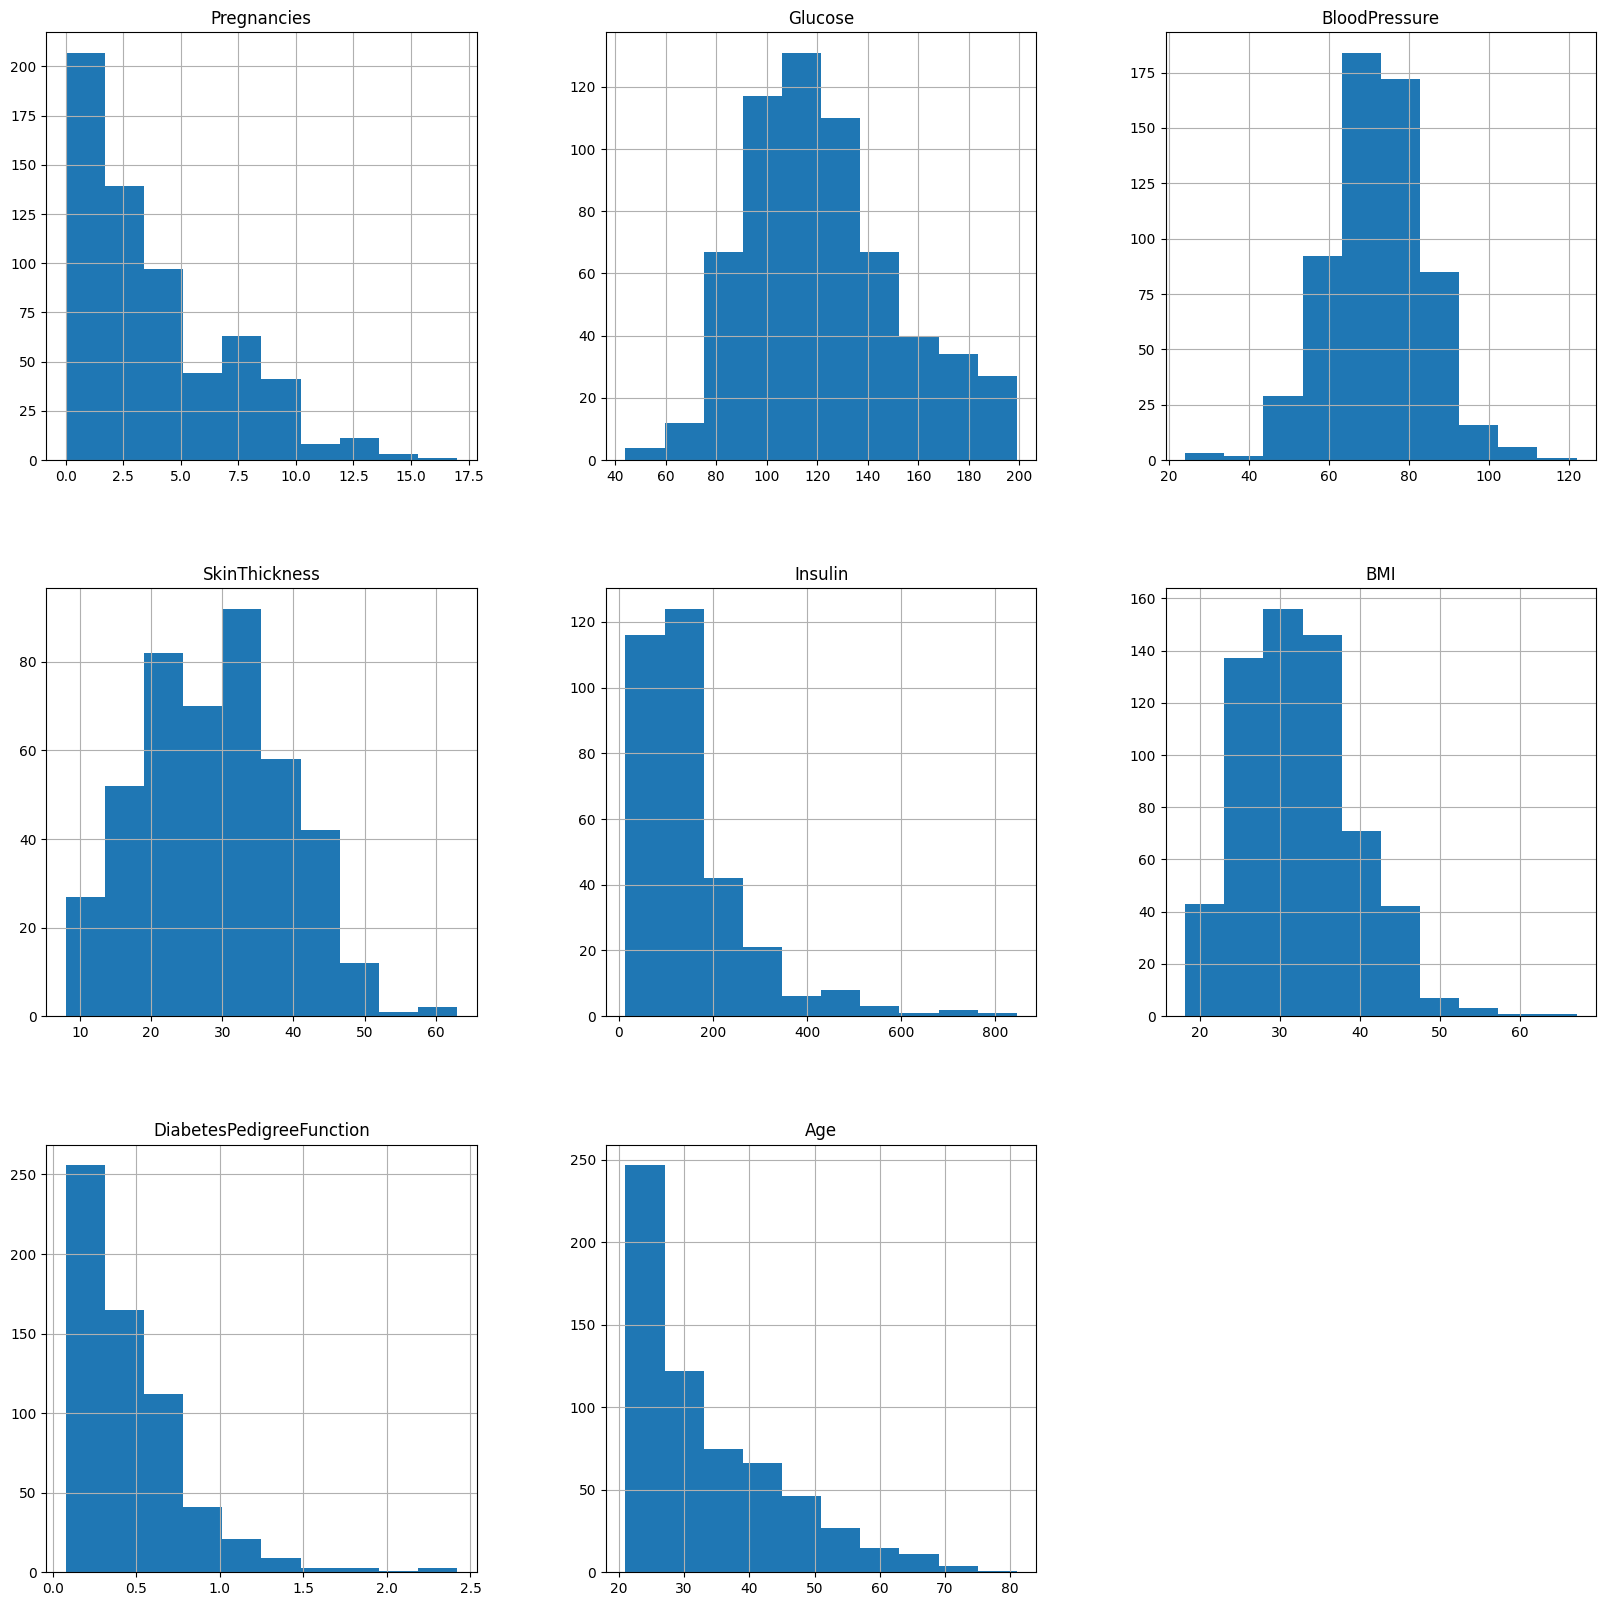

In [21]:
X_train.hist(figsize = (20,20))
plt.show()

In [22]:
# Function to calculate outlier bounds based on IQR
def calculate_outlier_bounds(dataframe):
    bounds = {}
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        bounds[column] = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    return bounds

# Calculate outlier bounds based on the training set
outlier_bounds = calculate_outlier_bounds(X_train)
outlier_bounds

{'Pregnancies': (-6.5, 13.5),
 'Glucose': (41.5, 197.5),
 'BloodPressure': (40.0, 104.0),
 'SkinThickness': (-1.5, 58.5),
 'Insulin': (-79.875, 341.125),
 'BMI': (13.500000000000002, 50.3),
 'DiabetesPedigreeFunction': (-0.3168750000000001, 1.172125),
 'Age': (0.0, 64.0)}

In [23]:
# Function to count outliers in the dataframe based on provided bounds
def count_outliers(dataframe, bounds):
    outlier_counts = {}
    for column in dataframe.columns:
        lower_bound, upper_bound = bounds[column]
        outlier_condition = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        outlier_counts[column] = outlier_condition.sum()
    return outlier_counts

# Count the number of outliers in each column of X_train and X_test
outliers_train = count_outliers(X_train, outlier_bounds)
outliers_test = count_outliers(X_test, outlier_bounds)

print("Number of outliers in each column of X_train:\n", outliers_train)
print("\nNumber of outliers in each column of X_test:\n", outliers_test)

Number of outliers in each column of X_train:
 {'Pregnancies': 4, 'Glucose': 2, 'BloodPressure': 9, 'SkinThickness': 2, 'Insulin': 21, 'BMI': 6, 'DiabetesPedigreeFunction': 26, 'Age': 13}

Number of outliers in each column of X_test:
 {'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 5, 'SkinThickness': 1, 'Insulin': 5, 'BMI': 2, 'DiabetesPedigreeFunction': 7, 'Age': 3}


In [24]:
# Function to cap outliers in the dataframe based on provided bounds
def cap_outliers(dataframe, bounds):
    for column in dataframe.columns:
        lower_bound, upper_bound = bounds[column]
        dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])
        dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])

# Cap outliers in both training and testing sets using these bounds
cap_outliers(X_train, outlier_bounds)
cap_outliers(X_test, outlier_bounds)

In [25]:
# Function to count outliers in the dataframe based on provided bounds
def count_outliers(dataframe, bounds):
    outlier_counts = {}
    for column in dataframe.columns:
        lower_bound, upper_bound = bounds[column]
        outlier_condition = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        outlier_counts[column] = outlier_condition.sum()
    return outlier_counts

# Count the number of outliers in each column of X_train and X_test
outliers_train = count_outliers(X_train, outlier_bounds)
outliers_test = count_outliers(X_test, outlier_bounds)

print("Number of outliers in each column of X_train:\n", outliers_train)
print("\nNumber of outliers in each column of X_test:\n", outliers_test)

Number of outliers in each column of X_train:
 {'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0}

Number of outliers in each column of X_test:
 {'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0}


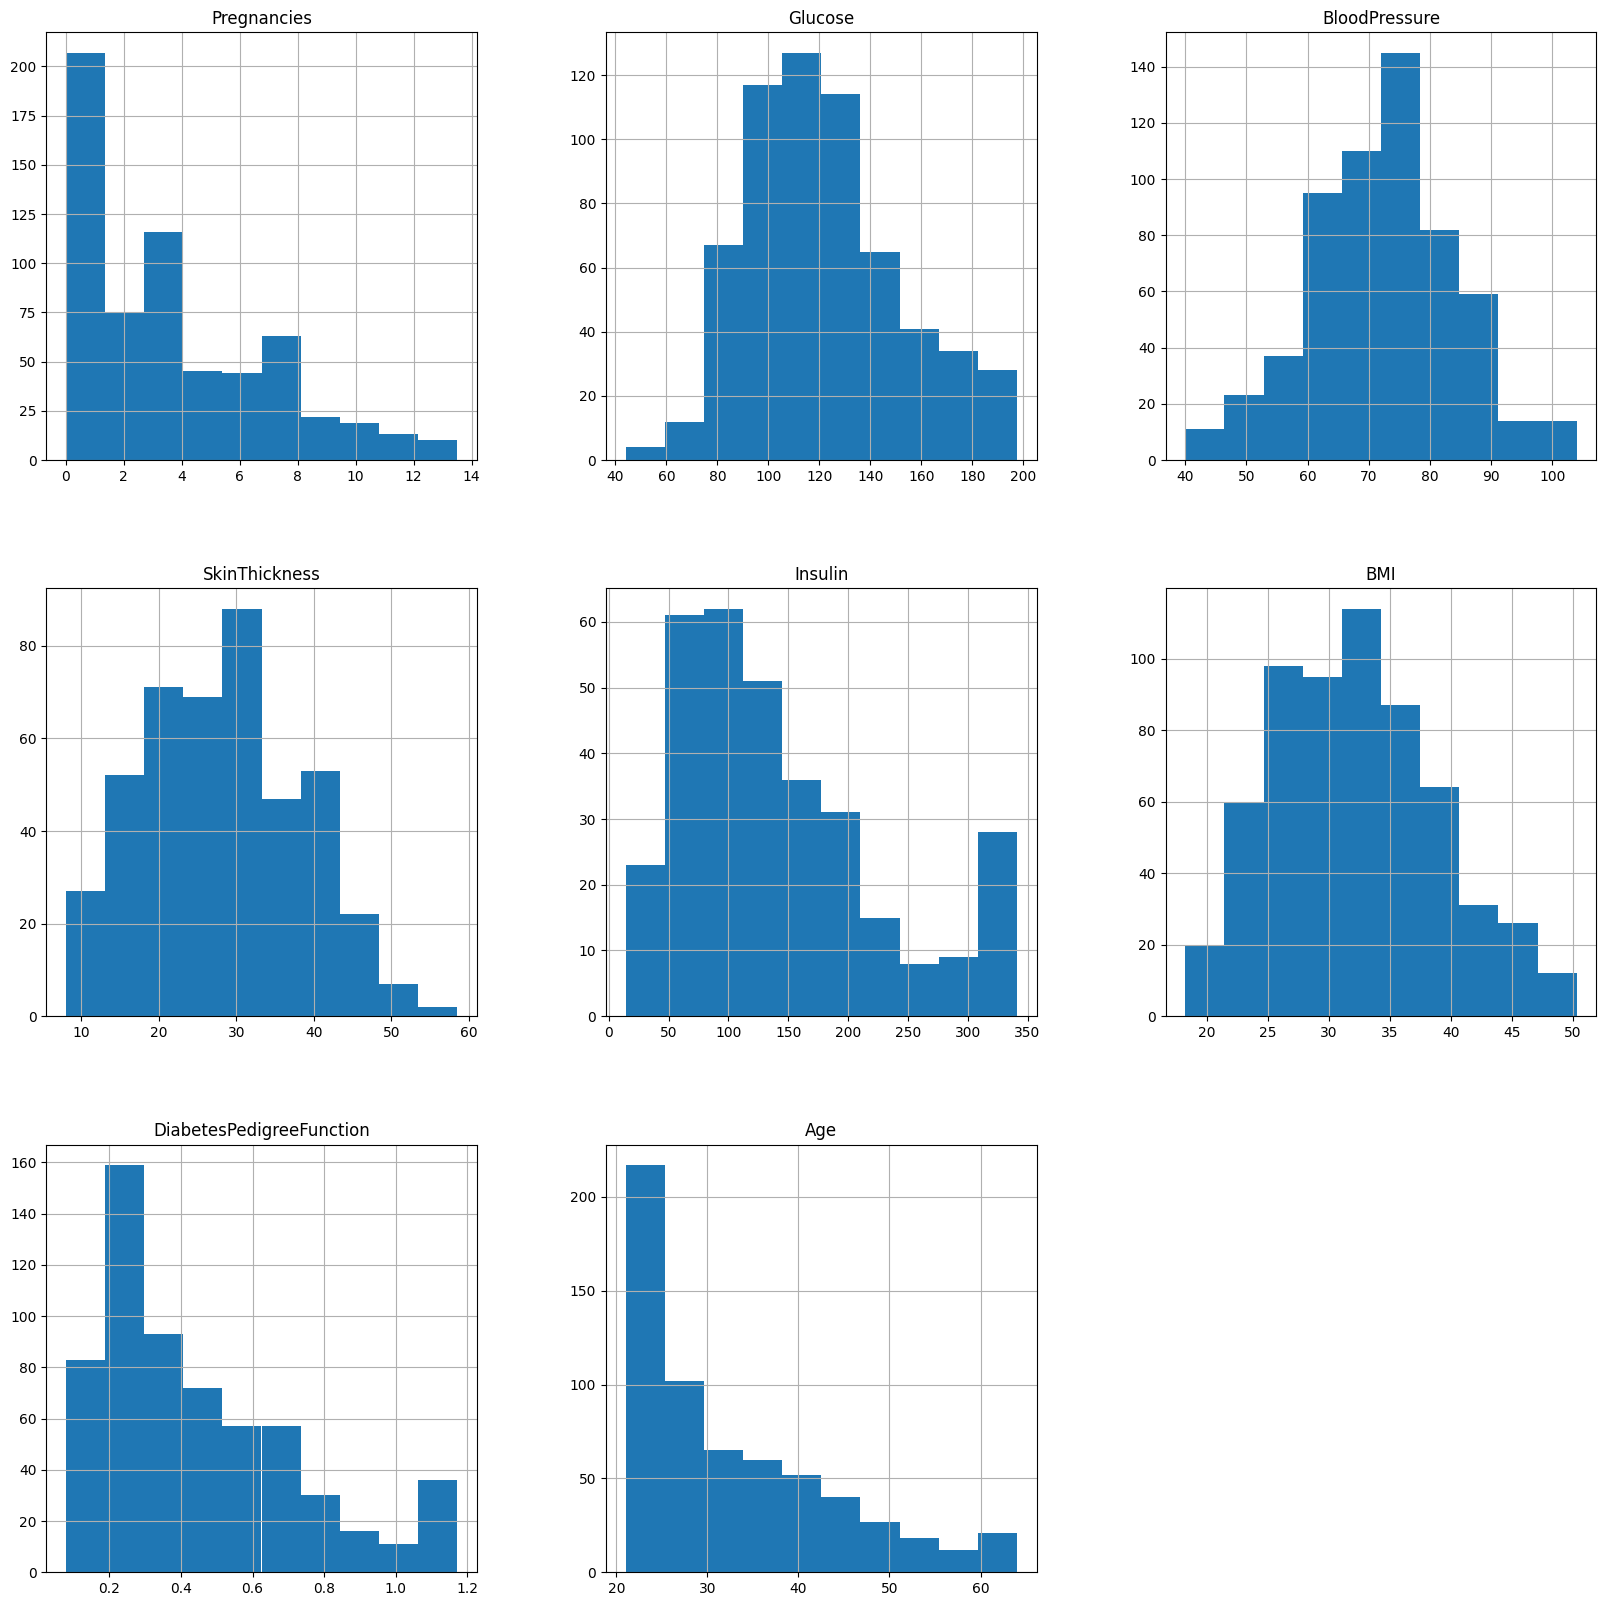

In [26]:
X_train.hist(figsize = (20,20))
plt.show()

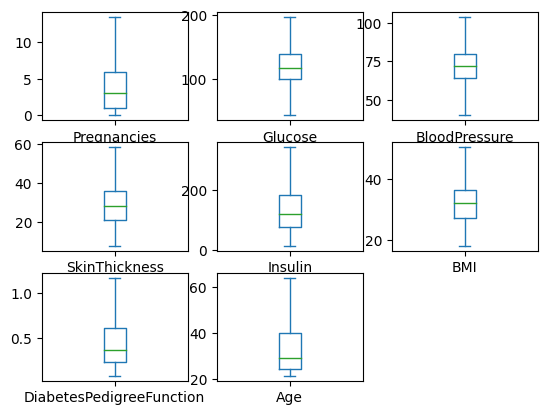

In [27]:
X_train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [28]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Counting NaN values in each specified column
print("X_train")
print(X_train[columns_to_check].isna().sum())
print("X_test")
print(X_test[columns_to_check].isna().sum())

X_train
Glucose            5
BloodPressure     24
SkinThickness    176
Insulin          290
BMI                7
dtype: int64
X_test
Glucose           0
BloodPressure    11
SkinThickness    51
Insulin          84
BMI               4
dtype: int64


In [29]:
# Columns for median and regression imputation
median_impute_cols = ['Glucose', 'BMI']
alg_impute_cols = ['SkinThickness', 'Insulin', 'BloodPressure']
other_features = [col for col in X_train.columns if col not in alg_impute_cols]

# Median Imputation
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[median_impute_cols] = median_imputer.fit_transform(X_train[median_impute_cols])
X_test[median_impute_cols] = median_imputer.transform(X_test[median_impute_cols])

def regression_imputation_fit(train_df, target_cols, predictor_cols):
    """Fit regression models for imputation on training data."""
    models = {}
    feature_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    feature_imputer.fit(train_df[predictor_cols])

    for target in target_cols:
        non_missing_data = train_df[train_df[target].notna()]
        imputed_predictors = feature_imputer.transform(non_missing_data[predictor_cols])

        if not non_missing_data.empty:
            model = LinearRegression()
            model.fit(imputed_predictors, non_missing_data[target])
            models[target] = model

    return models, feature_imputer

def regression_imputation_transform(df, target_cols, predictor_cols, models, feature_imputer):
    """Apply regression imputation models to a dataset."""
    for target in target_cols:
        model = models[target]
        missing_data = df[df[target].isna()]
        imputed_predictors = feature_imputer.transform(missing_data[predictor_cols])

        if not missing_data.empty:
            predicted_values = model.predict(imputed_predictors)
            df.loc[df[target].isna(), target] = predicted_values

# Fit and Apply Regression Imputation
models, feature_imputer = regression_imputation_fit(X_train, alg_impute_cols, other_features)
regression_imputation_transform(X_train, alg_impute_cols, other_features, models, feature_imputer)
regression_imputation_transform(X_test, alg_impute_cols, other_features, models, feature_imputer)

In [30]:
# Display class distribution in training data
print("Class distribution in training dataset:", Counter(y_train))

Class distribution in training dataset: Counter({0: 401, 1: 213})


In [31]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Implementing k-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')

# Fit and evaluate the logistic regression model on the test set
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Print classification report and accuracy score on the test set
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))
print("Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

# Print cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores)}')
print(f'Std CV accuracy: {np.std(cv_scores)}')


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

Accuracy Score on Test Set: 0.7597402597402597
Cross-validation accuracy scores: [0.80681818 0.80681818 0.76136364 0.75       0.76136364 0.73563218
 0.71264368]
Mean CV accuracy: 0.762091356918943
Std CV accuracy: 0.03227869392088245
